
GLOBAL SOLUTION 2

Disciplina: Front End & Mobile
Development

NOME: Henzzo Fonseca De Morais RM: 97917

Erick Camargo Eleutério - RM: 99589

1. Carregamento e Limpeza de Dados:

In [2]:
import pandas as pd

# Carregando dados
df = pd.read_csv('consumo_hidreletrico_brasil.csv')

# Exemplo de limpeza
df.dropna(inplace=True)  # Remove dados faltantes
df['data'] = pd.to_datetime(df['data'])  # Converte para formato de data
df.set_index('data', inplace=True)  # Define a data como índice


2. Implementação do Modelo ARIMA:

In [3]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustando o modelo
modelo = ARIMA(df['consumo_hidreletrico'], order=(1, 1, 1))  # Ajuste o (p, d, q)
resultado = modelo.fit()

# Fazendo previsões
previsao = resultado.forecast(steps=30)  # Previsão para 30 dias


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


3. Implementação do WebApp no Streamlit:

In [4]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00


2024-11-14 19:06:51.565 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 19:06:51.781 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-14 19:06:51.785 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 19:06:51.789 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 19:06:51.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 19:06:51.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 19:06:51.796 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 19:06:51.798 Thread 'MainThread': mi

DeltaGenerator()

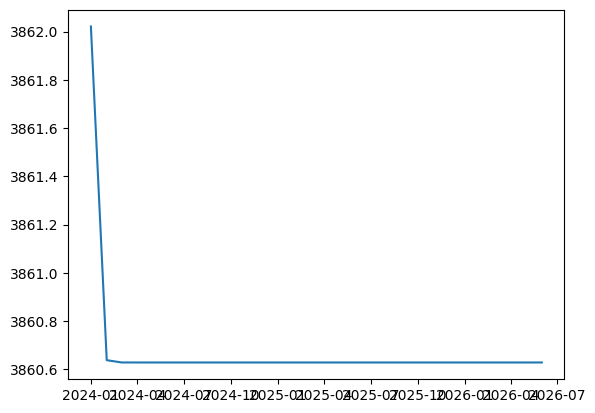

In [5]:
import streamlit as st
import matplotlib.pyplot as plt

st.title("Previsão de Consumo Energético no Brasil")

# Input de Datas
data_inicial = st.date_input("Data inicial", value=pd.to_datetime("2022-01-01"))
data_final = st.date_input("Data final", value=pd.to_datetime("2022-12-31"))

# Exibindo previsões
fig, ax = plt.subplots()
ax.plot(previsao, label="Previsão de Consumo")
st.pyplot(fig)
